In this notebook, we will apply `TableAutomization.py` file to a simple linear model.

### Importing the needed libraries 

In [11]:
import cuqi
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('..'))
import utilities
import benchmarksClass as BC 

# Simple Linear Model
We are considering the model:

$$b = x_1 + x_2 + e \;\;\mathrm{with}\;\; e \sim \mathrm{Gaussain}(0, 0.1)$$

We can write it as:

$$b = \mathbf{A}\mathbf{x} + e = \large(1,1\large)\binom{x_1}{x_2} + e$$






<div align="center">

|variable     |    description          |dimension      |
|:------------|:------------------------|:--------------|
|$\mathbf{x}$ |parameter to be inferred |2-dimensional​  |
|$\mathbf{A}$ |forward model            |1-by-2 matrix  |
|$b$          |data                     | 1-dimensional |
|$e$          |noise                    |1-dimensional  ​|

</div>


### inverse problem: given observed data $b$, determine $x_1$, and $x_2$

 

We assume prior as: $$ \mathbf{x} \sim \mathrm{Gaussian}(\mathbf{0}, \delta^2 \mathbf{I}) $$

In [12]:
target_simplest = BC.SimplestBip()
x0 = BC.SimplestBip().x0

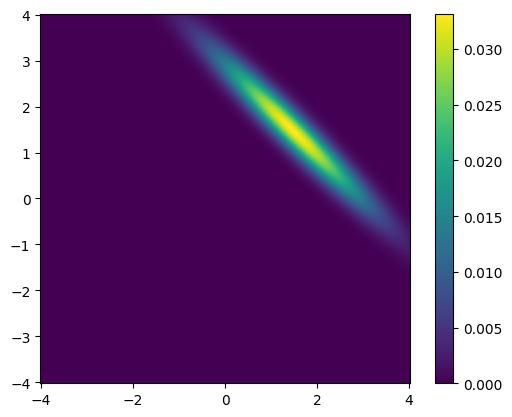

In [13]:
utilities.Plot(target_simplest).plot_pdf_2D(-4, 4, -4, 4)

Now we are ready to apply the TableAutomization function to this target distribution ! 

In [14]:
sample= utilities.MCMCComparison(target_simplest, x0 = x0,scale = [1.0,1.0,0.1,0.2,0.5], Ns = 8000, Nb= 2000, seed = 12,chains=3)

In [15]:
sample.create_comparison()

Sample 10000 / 10000

Average acceptance rate: 0.24 

Sample 10000 / 10000

Average acceptance rate all components: 0.359 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000

Average acceptance rate: 0.24 

Sample 10000 / 10000

Average acceptance rate all components: 0.359 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000

Average acceptance rate: 0.24 

Sample 10000 / 10000

Average acceptance rate all components: 0.359 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000


,MH,CWMH,ULA,MALA,NUTS
samples,8000,8000,8000,8000,8000
burnins,2000,2000,2000,2000,2000
scale,1.0,1.0,0.1,0.2,-
ESS(v0),163.039,62.246,95.166,88.347,1368.79
ESS(v1),161.577,63.04,93.769,89.917,1363.895
AR,0.24,0.361,1.0,0.493,0.728
LogPDF,20000,39998,20000,20000,105032
Gradient,0,0,20000,20000,105032
Rhat(v0),1.013,1.022,1.005,1.008,1.0
Rhat(v1),1.013,1.021,1.004,1.008,1.0


_Observations_
- We tuned scale so that acceptance rate is ideal for MH and MALA
- MH sampling outperformed ULA and MALA
- NUTS perfom best but needs large comptuational cost

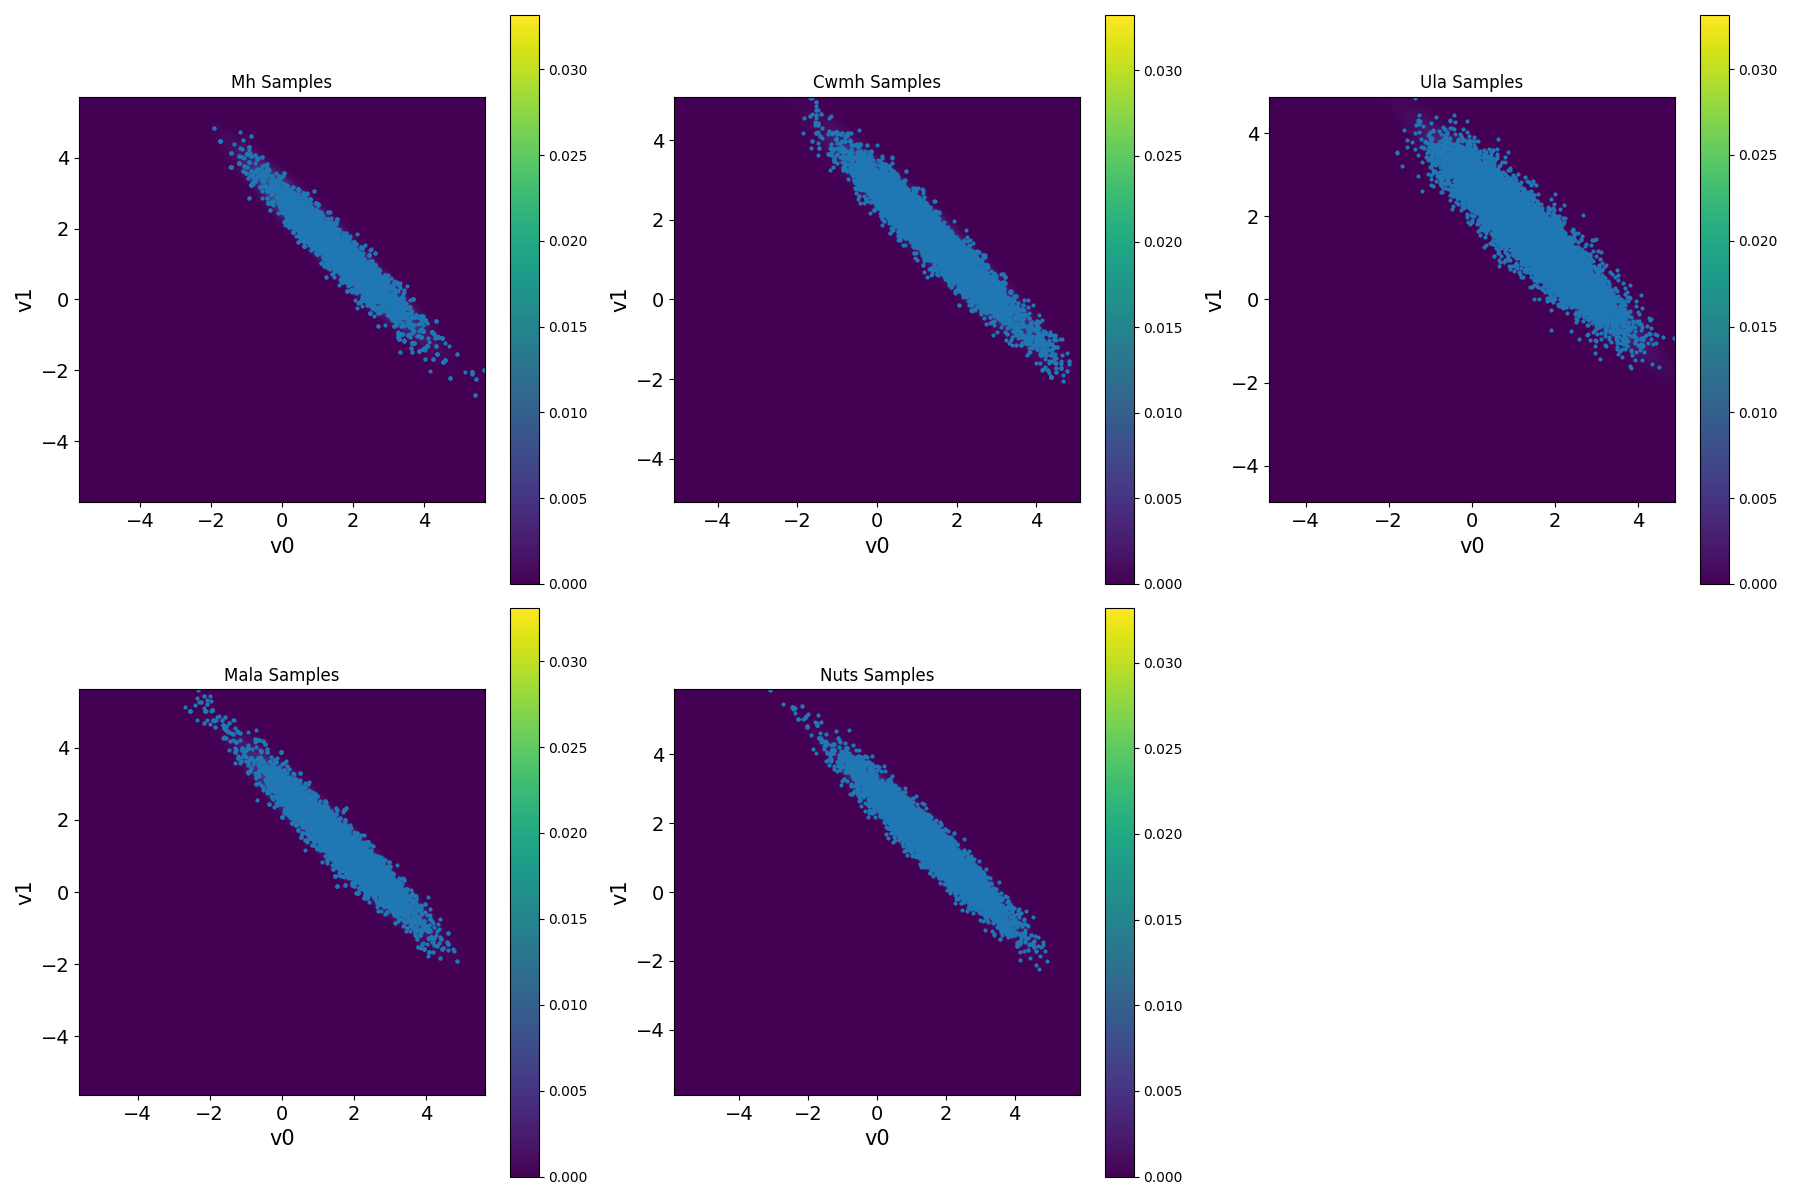

(<Figure size 1800x1200 with 10 Axes>,
 array([<Axes: title={'center': 'Mh Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: title={'center': 'Cwmh Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: title={'center': 'Ula Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: title={'center': 'Mala Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: title={'center': 'Nuts Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: >], dtype=object))

In [16]:
sample.create_plt()

_Observations_

・ULA might be converging to another distributon.